## **Perceptron trick**

# **Import Required Libraries**

In [74]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


Generate Synthetic **Data**

Generate dataset

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)


# **Visualize the Dataset**

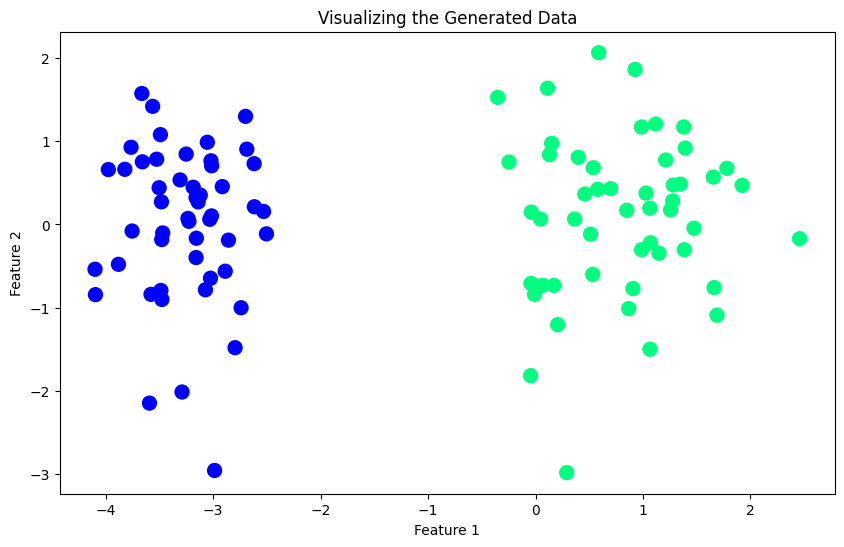

In [ ]:
# Plot the dataset to see class distribution
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualizing the Generated Data")
plt.show()


train the model

# Implementing Logistic Regression from Scratch

# Define Sigmoid Function

In [ ]:
# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Implement Basic Logistic Regression Using Gradient Descent

In [ ]:
def logistic_regression_basic(X, y, lr=0.01, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.zeros(X.shape[1])  # Initialize weights with zeros

    for i in range(epochs):
        linear_model = np.dot(X, weights)
        y_hat = sigmoid(linear_model)  # Apply sigmoid function
        gradient = np.dot(X.T, (y - y_hat)) / X.shape[0]  # Compute gradient
        weights += lr * gradient  # Update weights

    return weights[1:], weights[0]  # Return coefficients and intercept


# Train Basic Logistic Regression Model

In [ ]:
coef_, intercept_ = logistic_regression_basic(X, y)


# Compute Decision Boundary

In [ ]:
# Compute slope (m) and intercept (b) for decision boundary
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Generate x values for decision boundary
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b


# Visualize Decision Boundary

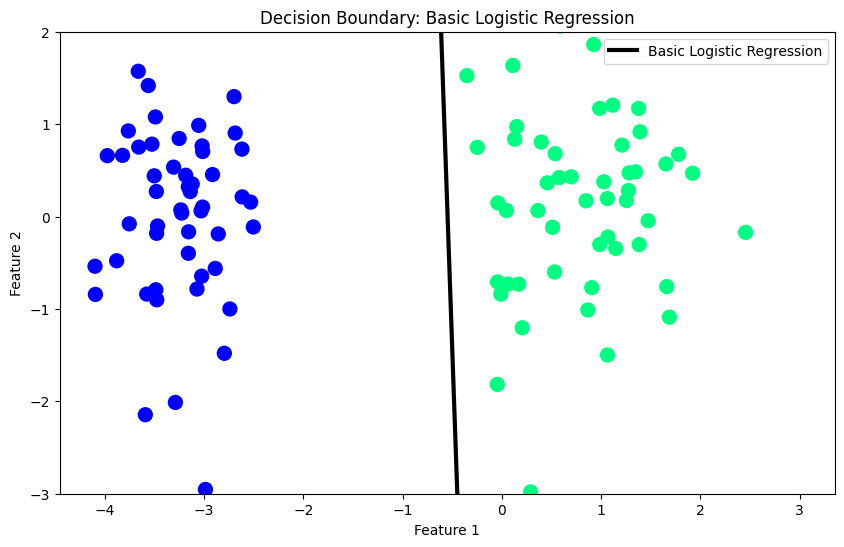

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="Basic Logistic Regression")
plt.ylim(-3, 2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary: Basic Logistic Regression")
plt.legend()
plt.show()


# *Improving Logistic Regression*

# **Improve Gradient Descent with Mini-batch Optimization**

In [ ]:
def logistic_regression_optimized(X, y, lr=0.1, epochs=5000, batch_size=10):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.zeros(X.shape[1])  # Initialize weights

    for i in range(epochs):
        indices = np.random.choice(X.shape[0], batch_size, replace=False)  # Mini-batch selection
        X_batch = X[indices]
        y_batch = y[indices]

        linear_model = np.dot(X_batch, weights)
        y_hat = sigmoid(linear_model)  # Compute predictions
        gradient = np.dot(X_batch.T, (y_batch - y_hat)) / batch_size  # Compute gradient
        weights += lr * gradient  # Update weights

    return weights[1:], weights[0]  # Return improved coefficients and intercep


**train optimized model**

In [ ]:
coef_opt, intercept_opt = logistic_regression_optimized(X, y)


# Compute Optimized Decision Boundary


In [ ]:
m_opt = -(coef_opt[0] / coef_opt[1])
b_opt = -(intercept_opt / coef_opt[1])

x_input2 = np.linspace(-3, 3, 100)
y_input2 = m_opt * x_input2 + b_opt


# **Compare Basic vs Optimized Model**

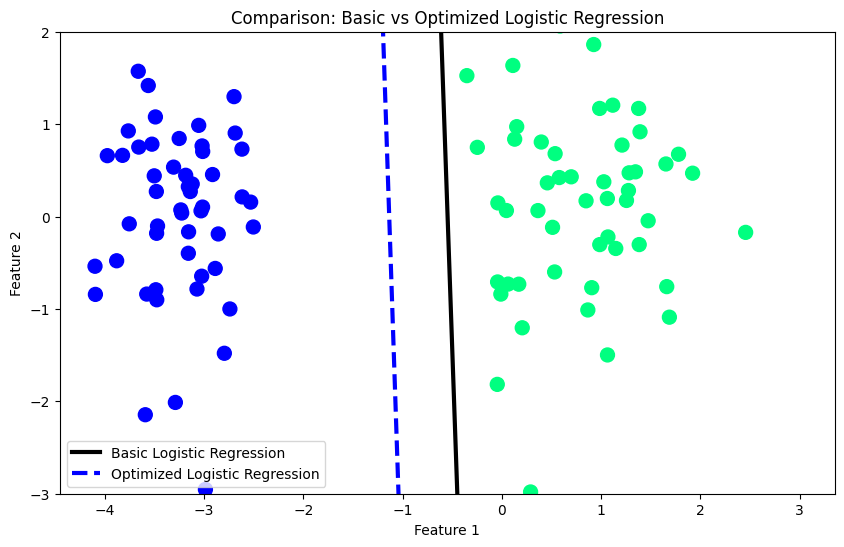

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="Basic Logistic Regression")
plt.plot(x_input2, y_input2, color='blue', linewidth=3, linestyle="dashed", label="Optimized Logistic Regression")
plt.ylim(-3, 2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Comparison: Basic vs Optimized Logistic Regression")
plt.legend()
plt.show()


## **Compare with Scikit-Learn's Logistic Regression**

# **Train Scikit-Learn Logistic Regression**

In [ ]:
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

# **Compute Scikit-Learn Decision Boundary**

In [ ]:
m_sklearn = -(lor.coef_[0][0] / lor.coef_[0][1])
b_sklearn = -(lor.intercept_ / lor.coef_[0][1])

x_input3 = np.linspace(-3, 3, 100)
y_input3 = m_sklearn * x_input3 + b_sklearn


# **Final Comparison of All Models**

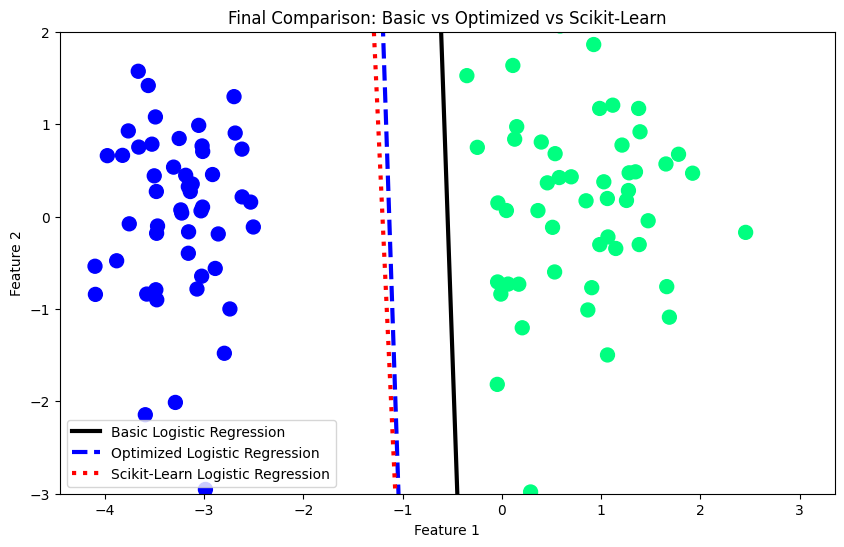

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

# Basic Model
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="Basic Logistic Regression")

# Optimized Model
plt.plot(x_input2, y_input2, color='blue', linewidth=3, linestyle="dashed", label="Optimized Logistic Regression")

# Scikit-learn Model
plt.plot(x_input3, y_input3, color='red', linewidth=3, linestyle="dotted", label="Scikit-Learn Logistic Regression")

plt.ylim(-3, 2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Final Comparison: Basic vs Optimized vs Scikit-Learn")
plt.legend()
plt.show()


### **Application of Logistic regrestion-1**##

breast cancer detector

In [75]:
import pandas as pd
import seaborn as sns


In [76]:
data=pd.read_csv("cancer_dataset.csv")

In [77]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: >

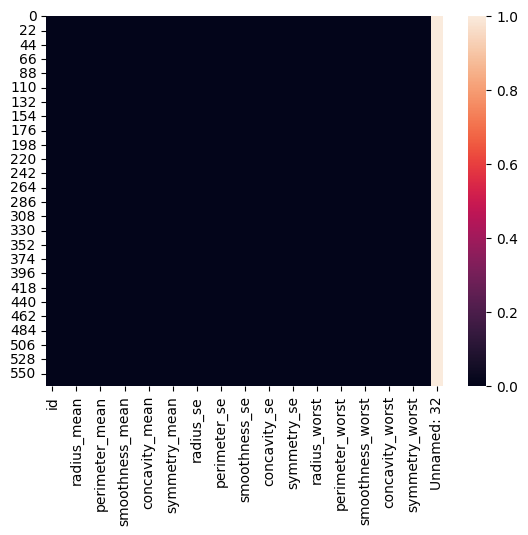

In [80]:
sns.heatmap(data.isnull())

In [81]:
data.drop(["Unnamed: 32","id"],axis=1,inplace= True)

In [82]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]



In [83]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [71]:
print(data.columns)  # Check if there's an issue with column names


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [84]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis'>

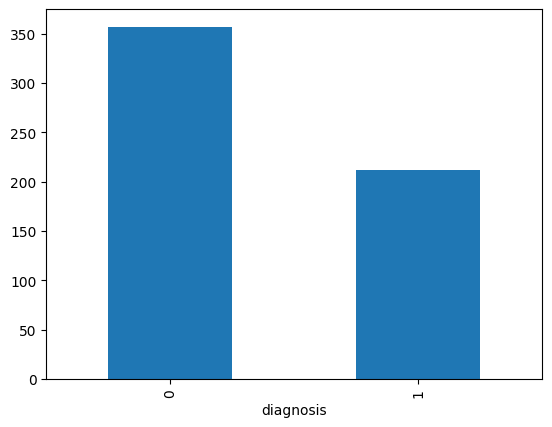

In [86]:
data["diagnosis"].value_counts().plot(kind="bar")

In [88]:
#devide into target variable and predictors
Y=data["diagnosis"]#our targer value
X=data.drop(["diagnosis"],axis=1)

In [89]:
Y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [90]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [94]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [102]:
# Check shape before splitting
print("Shape of X:", X.shape)  # Should be (569, n_features)
print("Shape of y:", Y.shape)  # Should be (569,)


Shape of X: (569, 30)
Shape of y: (569,)


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("cancer_dataset.csv")  # Ensure correct file path

# Drop any unnamed columns that may have been added accidentally
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Check column names
print("Columns in dataset:", data.columns)

# Convert diagnosis: 'M' -> 1, 'B' -> 0
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Ensure that we correctly extract the target and features
y = data["diagnosis"].values  # Target variable (569,)
X = data.drop(columns=["diagnosis"]).values  # Features (569, n_features)

# Verify dimensions
print("Shape of X:", X.shape)  # Should be (569, n_features)
print("Shape of Y:", y.shape)  # Should be (569,)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Columns in dataset: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Shape of X: (569, 31)
Shape of Y: (569,)
Training set size: (455, 31) (455,)
Test set size: (114, 31) (114,)


Logistic Regression (Scratch) Accuracy: 0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



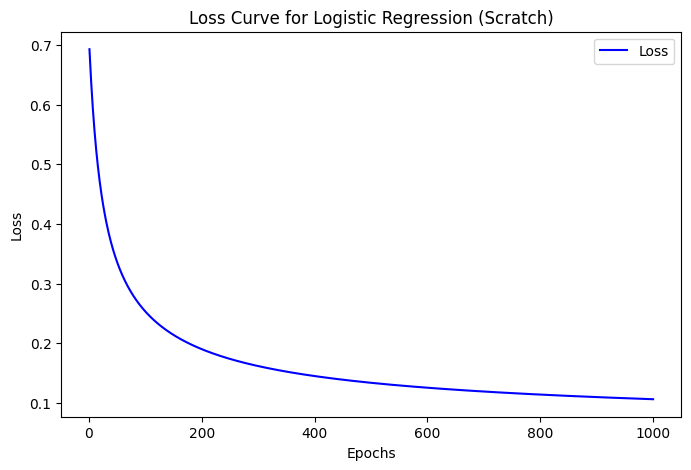

In [106]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute loss for visualization
            loss = self.compute_loss(y, predictions)
            self.loss_history.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if p > 0.5 else 0 for p in predictions]

# Train model
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)

# Predictions
y_pred_scratch = log_reg_scratch.predict(X_test)

# Evaluate
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Logistic Regression (Scratch) Accuracy:", accuracy_scratch)
print(classification_report(y_test, y_pred_scratch))

# Plot loss over epochs
plt.figure(figsize=(8,5))
plt.plot(range(1, len(log_reg_scratch.loss_history)+1), log_reg_scratch.loss_history, label="Loss", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Logistic Regression (Scratch)")
plt.legend()
plt.show()


In [107]:
# Train model
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

# Predictions
y_pred_sklearn = log_reg_sklearn.predict(X_test)

# Evaluate
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Logistic Regression (Sklearn) Accuracy:", accuracy_sklearn)
print(classification_report(y_test, y_pred_sklearn))


Logistic Regression (Sklearn) Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



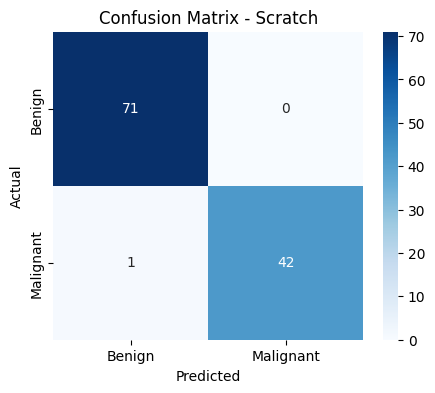

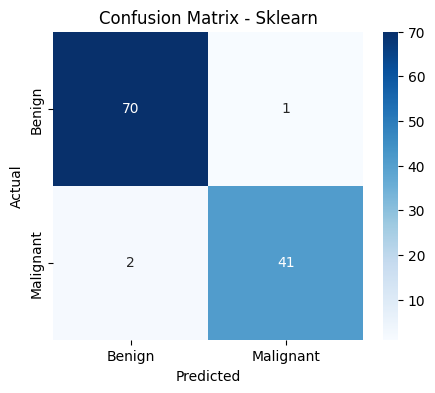

In [108]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot for Scratch Model
plot_confusion_matrix(y_test, y_pred_scratch, "Confusion Matrix - Scratch")

# Plot for Sklearn Model
plot_confusion_matrix(y_test, y_pred_sklearn, "Confusion Matrix - Sklearn")


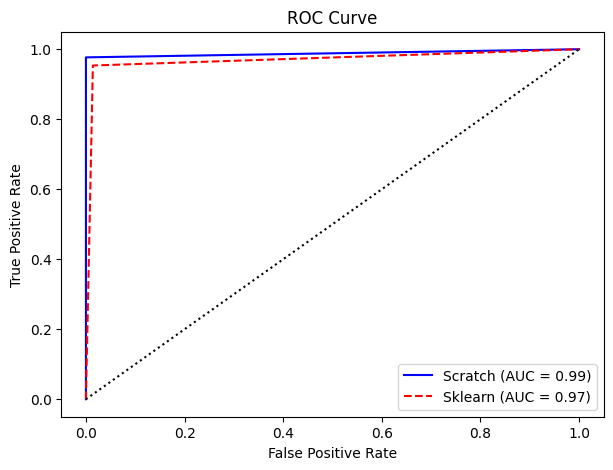

In [109]:
# Compute ROC curve
fpr_scratch, tpr_scratch, _ = roc_curve(y_test, log_reg_scratch.predict(X_test))
roc_auc_scratch = auc(fpr_scratch, tpr_scratch)

fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, log_reg_sklearn.predict(X_test))
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr_scratch, tpr_scratch, color='blue', label=f'Scratch (AUC = {roc_auc_scratch:.2f})')
plt.plot(fpr_sklearn, tpr_sklearn, color='red', linestyle='--', label=f'Sklearn (AUC = {roc_auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


<ipython-input-111-5d18efc15bd7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs, y=feature_names, palette="coolwarm")


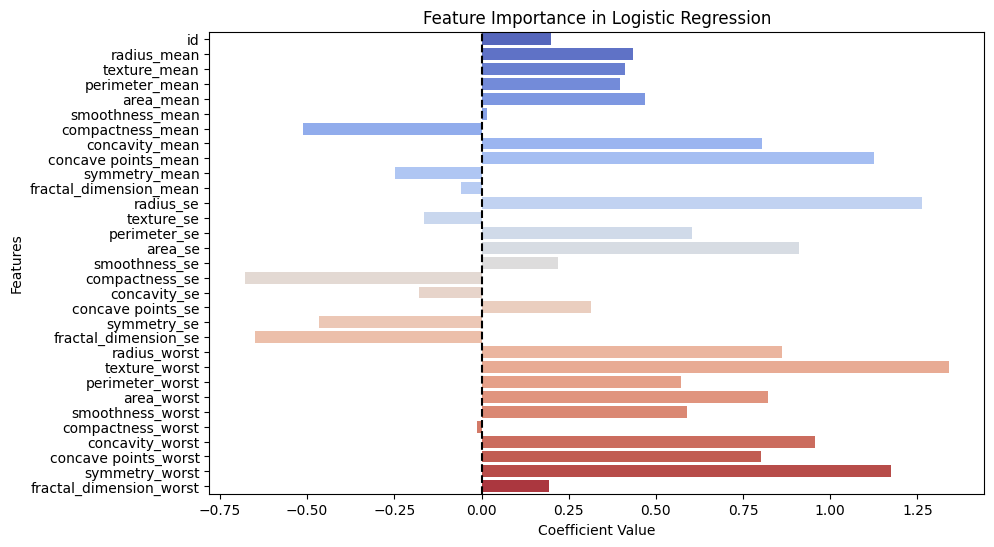

In [111]:
# Get feature importance (coefficients)
feature_names = data.drop(columns=['diagnosis']).columns
coefs = log_reg_sklearn.coef_.flatten()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs, y=feature_names, palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.axvline(x=0, color='black', linestyle='dashed')
plt.show()


In [112]:
print(f"Accuracy (Scratch): {accuracy_scratch:.2f}%")
print(f"Accuracy (Sklearn): {accuracy_sklearn:.2f}%")

if accuracy_scratch > accuracy_sklearn:
    print("The Logistic Regression from Scratch performed better!")
elif accuracy_scratch < accuracy_sklearn:
    print("The Sklearn Logistic Regression performed better!")
else:
    print("Both models have the same accuracy!")


Accuracy (Scratch): 0.99%
Accuracy (Sklearn): 0.97%
The Logistic Regression from Scratch performed better!
